# Steel-Concrete Composite Section Meshing

In [10]:
import numpy as np
import openseespy.opensees as ops
import opstool as opst
import matplotlib.pyplot as plt

The following materials are intended for the purpose of calculating section properties and are not related to OpenSeesPy.

In [11]:
Ec = 3.45e7
Es = 2.0e8
Nus = 0.3
Nuc = 0.2
pho_c = 2.55
pho_s = 7.86
steel_mat = opst.pre.section.create_material(name="steel",
                                             elastic_modulus=Es,
                                             poissons_ratio=Nus,
                                             density=pho_s)
conc_mat = opst.pre.section.create_material(name="conc",
                                            elastic_modulus=Ec,
                                            poissons_ratio=Nuc,
                                            density=pho_c)

In [12]:
outlines = [[0, 0], [2, 0], [2, 2], [0, 2]]
coverlines = opst.pre.section.offset(outlines, d=0.05)
cover_geo = opst.pre.section.create_polygon_patch(outlines,
                                                  holes=[coverlines],
                                                  material=conc_mat)
bonelines = [
    [0.5, 0.5],
    [1.5, 0.5],
    [1.5, 0.7],
    [1.1, 0.7],
    [1.1, 1.3],
    [1.5, 1.3],
    [1.5, 1.5],
    [0.5, 1.5],
    [0.5, 1.3],
    [0.9, 1.3],
    [0.9, 0.7],
    [0.5, 0.7],
    [0.5, 0.5],
]

core_geo = opst.pre.section.create_polygon_patch(coverlines,
                                                 holes=[bonelines],
                                                 material=conc_mat)

bone_geo = opst.pre.section.create_polygon_patch(bonelines, material=steel_mat)

In [13]:
SEC_MESH = opst.pre.section.FiberSecMesh()
SEC_MESH.add_patch_group(dict(cover=cover_geo, core=core_geo, bone=bone_geo))
SEC_MESH.set_mesh_size(dict(cover=0.1, core=0.2, bone=0.1))
SEC_MESH.set_mesh_color(dict(cover="gray", core="#b84592", bone="#ffc168"))
SEC_MESH.set_ops_mat_tag(dict(cover=1, core=2, bone=4))
SEC_MESH.mesh()

OPSTOOL :: The section My Section has been successfully meshed!

In [14]:
# add rebars
rebar_lines1 = opst.pre.section.offset(outlines, d=0.05 + 0.032 / 2)
SEC_MESH.add_rebar_line(points=rebar_lines1,
                        dia=0.032,
                        gap=0.1,
                        color="black",
                        ops_mat_tag=3)

Since it is a composite section, we use the elastic modulus of concrete as the reference modulus to obtain equivalent properties based on concrete material.

In [15]:
SEC_MESH.centring()
props = SEC_MESH.get_sec_props(Eref=Ec, display_results=True)

                              Section Properties                               
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 6.494E+00              │ Cross-sectional area                   │
│ Asy       │ 5.357E+00              │ Shear area y-axis                      │
│ Asz       │ 4.557E+00              │ Shear area z-axis                      │
│ centroid  │ (0.000E+00, 0.000E+00) │ Elastic centroid                       │
│ Iy        │ 1.664E+00              │ Moment of inertia y-axis               │
│ Iz        │ 1.495E+00              │ Moment of inertia z-axis               │
│ Iyz       │ 4.319E-15              │ Product of inertia                     │
│ Wyt       │ 1.664E+00              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 1.664E+00              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 1.495E+00              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 1.495E+00              │ Section moduli of bottom fibres z-axis │
│ J         │ 2.482E+00              │ Torsion constant                       │
│ phi       │ 0.000E+00              │ Principal axis angle                   │
│ mass      │ 1.296E+01              │ Section mass                           │
│ rho_rebar │ 1.548E-02              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

Or use the faster property calculation method for frame elements

In [16]:
frame_props = props = SEC_MESH.get_frame_props(Eref=Ec, display_results=True)

                           Frame Section Properties                            
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 6.494E+00              │ Cross-sectional area                   │
│ centroid  │ (0.000E+00, 0.000E+00) │ Elastic centroid                       │
│ Iy        │ 1.664E+00              │ Moment of inertia y-axis               │
│ Iz        │ 1.495E+00              │ Moment of inertia z-axis               │
│ Iyz       │ 1.490E-07              │ Product of inertia                     │
│ Wyt       │ 1.664E+00              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 1.664E+00              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 1.495E+00              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 1.495E+00              │ Section moduli of bottom fibres z-axis │
│ J         │ 2.482E+00              │ Torsion constant                       │
│ phi       │ 0.000E+00              │ Principal axis angle                   │
│ rho_rebar │ 1.548E-02              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

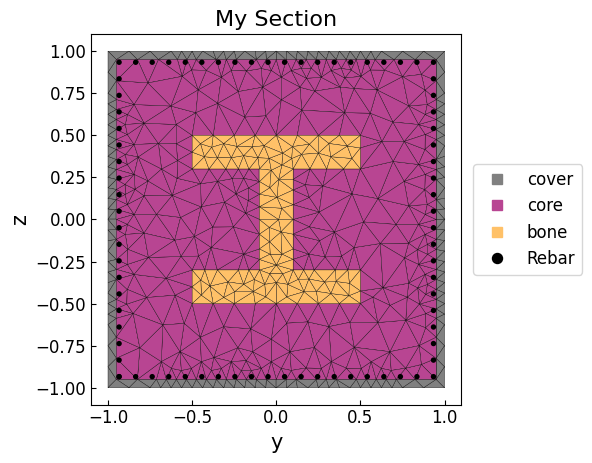

In [17]:
SEC_MESH.view(fill=True, show_legend=True)